# Publication Transformation

In this notebook, I have gathered all the raw dataframes that I previously obtained from PubMed through web scraping. 

* First, I vertically concatenated all the documents, 
* Second I split the data into columns, and
* Third, I performed proper cleaning of the data.

The goal was to integrate the data into the neuropapers database.

INDEX

___
## Concatenate all the dataframes vertically

In [3]:
# Libraries
import os
import pandas as pd

# Functions
import sys
sys.path.append('../src')
from support_transform import *
from support_clean import *

# Natural Language Toolkit
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# list the files
folder = '../data/pubmed/'
files_in_folder = os.listdir(folder)

In [3]:
# Open all the .csv files as DataFrames

list_dfs = []

min_num = int(min(files_in_folder)[7:10])
max_num = int(max(files_in_folder)[7:10]) + 1

for num in range(min_num, max_num):
    if num < 10:
        name = f'00{num}'
    elif num < 100:
        name = f'0{num}'
    elif num < 1000:
        name = f'{num}'
    else:
        raise("Don't exceed yourself with the amount of data, Inés!")
    
    df_name = f'df_{name}'
    file_name = f'../data/pubmed/raw_df_{name}.csv'
    
    try:
        globals()[df_name] = pd.read_csv(file_name, sep=';')
        list_dfs.append(df_name)
        
    except:
        globals()[df_name] = pd.read_csv(file_name, encoding='latin-1')
        list_dfs.append(df_name)
        continue

In [4]:
len(list_dfs)

82

In [5]:
# Concatenate vertically all the dataframes
dataframes = {name: globals()[name] for name in list_dfs}
pubmed = pd.concat(dataframes.values(), axis=0, ignore_index=True)

In [8]:
display(df.shape)
df = df.drop_duplicates()
df.shape

(7855328, 1)

(68171, 1)

In [86]:
df.to_csv('../data/articles/articles_raw.csv')

___
## Divide the data in columns

##### Description of the fields
    PMID: PubMed Identifier for the article (PubMed unique identifier).
    OWN: Ownership or database where the record is held (e.g., NLM for National Library of Medicine).
    STAT: Article status (e.g., MEDLINE).
    DCOM: Date of completion (e.g., 20220128).
    LR: Last revision date (e.g., 20220128).
    IS: ISSN (International Standard Serial Number) for electronic and linking formats.
    VI: Volume.
    DP: Date of publication.
    TI: Title of the article.
    LID: Locator ID (e.g., DOI - Digital Object Identifier).
    AB: Abstract of the article.
    CI: Copyright information.
    FAU: Full Author Name.
    AU: Abbreviated Author Name.
    AUID: Author Identifier (e.g., ORCID).
    AD: Author's affiliation.
    LA: Language of the article (e.g., English).
    PT: Publication type (e.g., Journal Article, Research Support).
    DEP: Date of entry into PubMed.
    PL: Place of publication (e.g., England).
    TA: Journal title abbreviation.
    JT: Full Journal Title.
    JID: Journal ID (e.g., NLM unique identifier).
    RN: Registry Number (e.g., for chemical substances).
    SB: Source of publication (e.g., IM for Index Medicus).
    MH: MeSH terms (Medical Subject Headings).
    PMC: PubMed Central ID.
    OTO: Other Term(s).
    OT: Original title or other information.
    COIS: Conflict of Interest Statement.
    EDAT: Entry Date.
    MHDA: Date of last major update.
    CRDT: Create Date.
    PHST: Publication History Status and Dates.
    AID: Article Identifier (e.g., DOI or PMID).
    PST: Publication Status.
    SO: Source (e.g., Journal citation with title, volume, and page).
    
##### Example of extracted data
'PMID- 37815691\nOWN - NLM\nSTAT- MEDLINE\nDCOM- 20231121\nLR  - 20231123\nIS  - 1995-8218 (Electronic)\nIS  - 1673-7067 (Print)\nIS  - 1995-8218 (Linking)\nVI  - 39\nIP  - 12\nDP  - 2023 Dec\nTI  - Propofol Brings on the Light for Depression Therapy.\nPG  - 1891-1894\nLID - 10.1007/s12264-023-01133-7 [doi]\nFAU - Yan, Yun\nAU  - Yan Y\nAUID- ORCID: 0000-0002-9993-4959\nAD  - Department of Anesthesiology, China-Japan Friendship Hospital, Chinese Academy of \n      Medical Sciences and Peking Union Medical College, Beijing, 100029, China.\nFAU - Ma, Hongli\nAU  - Ma H\nAUID- ORCID: 0000-0001-8925-1372\nAD  - Department of Anesthesiology, China-Japan Friendship Hospital, Chinese Academy of \n      Medical Sciences and Peking Union Medical College, Beijing, 100029, China.\nFAU - Zhao, Jing\nAU  - Zhao J\nAUID- ORCID: 0000-0002-4640-2609\nAD  - Department of Anesthesiology, China-Japan Friendship Hospital, Chinese Academy of \n      Medical Sciences and Peking Union Medical College, Beijing, 100029, China. \n      zhaojing1009@aliyun.com.\nLA  - eng\nPT  - Journal Article\nDEP - 20231010\nPL  - Singapore\nTA  - Neurosci Bull\nJT  - Neuroscience bulletin\nJID - 101256850\nRN  - YI7VU623SF (Propofol)\nSB  - IM\nMH  - *Propofol/therapeutic use\nMH  - Depression/drug therapy\nPMC - PMC10661581\nCOIS- The authors declare that there are no conflicts of interest.\nEDAT- 2023/10/10 12:43\nMHDA- 2023/11/21 06:43\nPMCR- 2024/12/01\nCRDT- 2023/10/10 11:11\nPHST- 2023/04/11 00:00 [received]\nPHST- 2023/08/22 00:00 [accepted]\nPHST- 2024/12/01 00:00 [pmc-release]\nPHST- 2023/11/21 06:43 [medline]\nPHST- 2023/10/10 12:43 [pubmed]\nPHST- 2023/10/10 11:11 [entrez]\nAID - 10.1007/s12264-023-01133-7 [pii]\nAID - 1133 [pii]\nAID - 10.1007/s12264-023-01133-7 [doi]\nPST - ppublish\nSO  - Neurosci Bull. 2023 Dec;39(12):1891-1894. doi: 10.1007/s12264-023-01133-7. Epub \n      2023 Oct 10.'

In [47]:
articles = pd.concat([df, df['0'].apply(lambda x: pd.Series(extraer_informacion(x)))], axis = 1)
articles.drop('0', axis = 1, inplace = True)
articles.shape

(68171, 38)

In [10]:
articles.to_csv('../data/articles/articles_raw_df.csv')

___
## Data cleansing

In [6]:
# articles = pd.read_csv('../data/articles/articles_raw_df.csv', index_col=False)
# articles.drop(columns='Unnamed: 0', axis=1, inplace=True)
# articles.columns

In [10]:
df = articles.copy()

In [11]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68171 entries, 0 to 68170
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     68158 non-null  float64
 1   ownership              68158 non-null  object 
 2   status                 68158 non-null  object 
 3   completion_date        57064 non-null  float64
 4   last_revision          68158 non-null  float64
 5   ISSN                   68158 non-null  object 
 6   volume                 67579 non-null  float64
 7   issue                  40295 non-null  float64
 8   publication_date       68158 non-null  object 
 9   title                  68158 non-null  object 
 10  pages                  65745 non-null  object 
 11  DOI                    66899 non-null  object 
 12  authors                67574 non-null  object 
 13  first_auth             67574 non-null  object 
 14  last_auth              67574 non-null  object 
 15  au

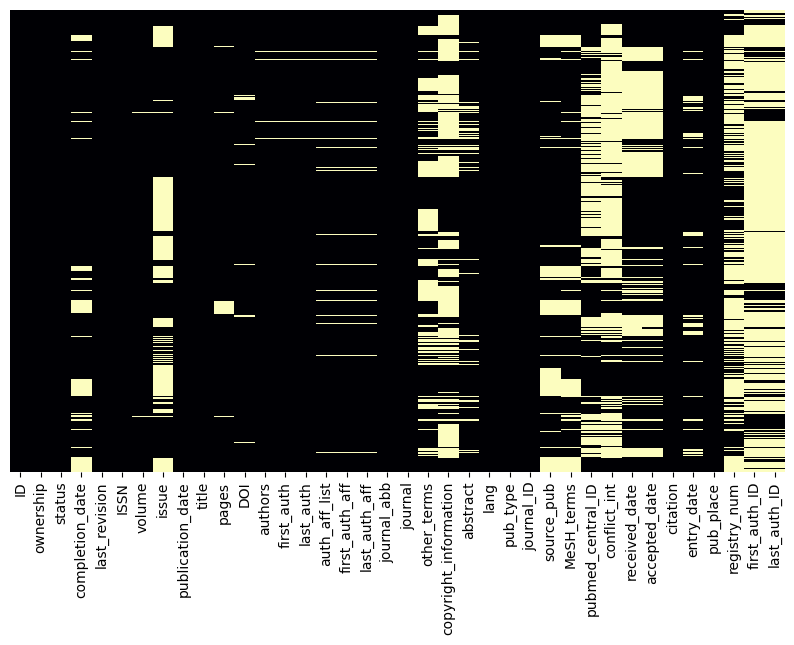

In [12]:
view_nan(df)

#### 'ID' column

In [13]:
display(df.shape)
df = df.dropna(subset=['ID'])
display(df.shape)

(68171, 38)

(68158, 38)

In [14]:
df['ID'] = df['ID'].astype('int64')
df['ID'].info()

<class 'pandas.core.series.Series'>
Int64Index: 68158 entries, 0 to 68170
Series name: ID
Non-Null Count  Dtype
--------------  -----
68158 non-null  int64
dtypes: int64(1)
memory usage: 1.0 MB


#### Drop constant columns

In [15]:
constant_columns(df)

([], ['ownership', 'lang'])

In [16]:
display(df.shape)
df.drop(['ownership', 'lang'], axis=1, inplace=True)
display(df.shape)

(68158, 38)

(68158, 36)

#### Drop columns

In [17]:
df.isna().sum().sort_values(ascending = False).head(10)

last_auth_ID             52579
first_auth_ID            52579
conflict_int             44734
registry_num             39483
copyright_information    36839
pubmed_central_ID        29715
issue                    27863
received_date            23461
accepted_date            23228
other_terms              22031
dtype: int64

In [18]:
to_drop = ['last_auth_ID',          
           'first_auth_ID',            
           'conflict_int',             
           'registry_num',             
           'copyright_information',    
           'pubmed_central_ID',        
           'issue',                    
           'received_date',            
           'accepted_date']           

In [19]:
display(df.shape)
df = df.drop(columns=to_drop)
display(df.shape)

(68158, 36)

(68158, 27)

In [20]:
df.isna().sum().sort_values(ascending = False).head(10)

other_terms        22031
source_pub         14714
MeSH_terms         13740
completion_date    11094
entry_date          6044
abstract            5532
pages               2413
last_auth_aff       2057
first_auth_aff      2057
auth_aff_list       2057
dtype: int64

In [21]:
to_drop = ['source_pub',          
           'completion_date',            
           'entry_date']   

In [22]:
display(df.shape)
df = df.drop(columns=to_drop)
display(df.shape)

(68158, 27)

(68158, 24)

In [23]:
df.isna().sum().sort_values(ascending = False).head(12)

other_terms       22031
MeSH_terms        13740
abstract           5532
pages              2413
auth_aff_list      2057
first_auth_aff     2057
last_auth_aff      2057
DOI                1259
authors             584
first_auth          584
last_auth           584
volume              579
dtype: int64

___
### Fill NaN values
#### Merge terms in one column

In [24]:
df['other_terms'].head(2)

0    ['Hippocampal neurogenesis', 'Major depressive...
1    ['Cerebral ischemic injury', 'Inflammation', '...
Name: other_terms, dtype: object

In [25]:
df['MeSH_terms'].head(2)

0    ['Adult', 'Animals', 'Humans', '*Depressive Di...
1    ['Mice', 'Animals', 'NF-kappa B/metabolism', '...
Name: MeSH_terms, dtype: object

In [26]:
df['terms'] = df['other_terms'].fillna(df['MeSH_terms'])

In [27]:
df[['terms', 'other_terms', 'MeSH_terms']].isna().sum()

terms           1550
other_terms    22031
MeSH_terms     13740
dtype: int64

In [28]:
to_drop = ['other_terms', 'MeSH_terms']
display(df.shape)
df = df.drop(columns=to_drop)
display(df.shape)

(68158, 25)

(68158, 23)

#### abstract

In [29]:
df['title'].loc[df['abstract'].isna()].head()

29     Correction: Gas6 induces infammation and reduc...
123    Correction: Smek1 deficiency exacerbates exper...
180    Correction: Association of dimethylarginines a...
231    Retraction Note to: Regulation of autophagy by...
243    Correction: Caffeine blocks disruption of bloo...
Name: title, dtype: object

In [30]:
display(df.shape)
df = df.dropna(subset=['abstract'])
display(df.shape)

(68158, 23)

(62626, 23)

#### authors

In [31]:
df['title'].loc[df['authors'].isna()].head()

3669     Erratum: Covariance properties under natural i...
3711     Retraction: Deep learning for autism diagnosis...
3727     Retraction: Spiking correlation analysis of sy...
4669     Retraction: Sensing risk, fearing uncertainty:...
12409    CORRIGENDUM to The Language Connectome: New Pa...
Name: title, dtype: object

In [32]:
display(df.shape)
df = df.dropna(subset=['authors'])
display(df.shape)

(62626, 23)

(62552, 23)

#### DOI

In [33]:
df.isna().sum().sort_values(ascending = False).head(8)

pages             2362
DOI               1086
last_auth_aff      797
auth_aff_list      797
first_auth_aff     797
terms              546
volume             536
pub_place            0
dtype: int64

In [34]:
df['citation'].loc[df['DOI'].isna()].head(2)

3168    J Neuroinflammation. 2012 Sep 13;9:214. doi: 1...
3173    J Neuroinflammation. 2012 Sep 3;9:209. doi: 10...
Name: citation, dtype: object

In [35]:
df['DOI'] = df['DOI'].fillna(df['citation'].str.extract(r'doi:\s*(\S+)', expand=False))

In [36]:
display(df.shape)
df = df.dropna(subset=['DOI'])
display(df.shape)

(62552, 23)

(61981, 23)

#### pages

In [37]:
df[['citation', 'volume']].loc[df['pages'].isna()].head(2)

,citation,volume
5392,Front Comput Neurosci. 2010 Sep 24;4:133. doi:...,4.0
5395,Front Comput Neurosci. 2010 Sep 22;4:132. doi:...,4.0


In [38]:
df['pages'] = df['pages'].fillna(df['citation'].str.extract(r':\s*([^.]+)\.', expand=False))

In [39]:
df['pages'] = df['pages'].fillna('-')

#### volume

In [40]:
df['citation'].loc[df['volume'].isna()]

5414     J Neurophysiol. 2023 Nov 15. doi: 10.1152/jn.0...
5415     J Neurophysiol. 2023 Nov 15. doi: 10.1152/jn.0...
5416     J Neurophysiol. 2023 Nov 15. doi: 10.1152/jn.0...
5417     J Neurophysiol. 2023 Nov 15. doi: 10.1152/jn.0...
5418     J Neurophysiol. 2023 Nov 15. doi: 10.1152/jn.0...
                               ...                        
64632    J Hist Neurosci. 2023 Nov 8:1-11. doi: 10.1080...
64634    J Hist Neurosci. 2023 Oct 20:1-56. doi: 10.108...
64641    J Hist Neurosci. 2023 Sep 18:1-22. doi: 10.108...
65782    J Hist Neurosci. 2023 Sep 8:1-16. doi: 10.1080...
65783    J Hist Neurosci. 2023 Jul 21:1-16. doi: 10.108...
Name: citation, Length: 536, dtype: object

In [41]:
df['volume'] = df['volume'].fillna(df['citation'].str.extract(r'(\d+)\s*:', expand=False))

In [42]:
df['volume'] = df['volume'].fillna('')

## Create a column of the abstract without stopwords

In [43]:
# Download the stopwords dataset
nltk.download('stopwords')

# Download the NLTK data for tokenization
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ingle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ingle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
def remove_stopwords(text):
    '''
    Remove common English stopwords from a given text.

    Parameters:
    - text (str): The input text from which stopwords will be removed.

    Returns:
    - str or None: If the input text is not null, the function returns the modified text
      with stopwords removed. If the input text is null, it returns None.
    '''
    if pd.isnull(text):
        return None
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [45]:
df['abstract_words'] = df['abstract'].apply(remove_stopwords)

## Create a column of the abstract keywords

In [46]:
def get_most_frequent_words(text, num_words=5):
    '''
    Get the most frequent words from a given text.

    Parameters:
    - text (str): The input text from which to extract the most frequent words.
    - num_words (int, optional): The number of most frequent words to retrieve (default is 5).

    Returns:
    - list: A list containing the most frequent words in the input text.
    '''
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_words = [word.lower() for word in word_tokens if word.isalpha() and word.lower() not in stop_words]
    freq_dist = FreqDist(filtered_words)
    most_common = freq_dist.most_common(num_words)
    return [word[0] for word in most_common]

In [47]:
df['keywords'] = df['abstract'].apply(get_most_frequent_words)

#### terms
Here, the idea is to fill the terms with the most common words of the abstract,

In [48]:
# Fill NaN values in 'terms' with the abstract's keywords
df['terms'] = df.apply(lambda row: row['keywords'] if pd.isnull(row['terms']) else row['terms'], axis=1)

___
## Separate the data into groups

In [54]:
df = df.rename(columns={'ID': 'pub_id'})
df = df.rename(columns={'journal_ID': 'journal_id'})

### publications

In [56]:
pub_columns = ['pub_id', 'status', 'last_revision', 'volume', 'publication_date', 'title', 
               'pages', 'DOI', 'authors', 'journal', 'journal_id', 'abstract', 'abstract_words', 'keywords',
               'terms', 'pub_type', 'citation']

In [57]:
df[pub_columns].to_csv('../data/publications_df.csv')

### researchers

In [58]:
res_columns = ['pub_id', 'authors', 'journal_id', 'first_auth', 'last_auth', 'auth_aff_list', 'first_auth_aff', 'last_auth_aff']

In [59]:
df[res_columns].to_csv('../data/researchers_df.csv')

### affiliations

In [60]:
aff_columns = ['pub_id', 'authors', 'auth_aff_list', 'first_auth_aff', 'last_auth_aff']

In [61]:
df[aff_columns].to_csv('../data/affiliations_df.csv')